
ISLAMIC BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@25.00%): 62,500.00

---------END OF SIMULATION----------
Status: SUCCESS
Total period of payment t = 10 months | Within grace period

Loan Remaining: 0.00 | Loan Paid: 62,500.00
Profit made (@25.00%): 405,513.45 | Final bank payment (@12.00%): 24,629.82 | Net profit: 378,883.62
Amount Reinvested: 3,620,991.20


CONVENTIONAL BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@1.20%): 50,600.00

---------END OF SIMULATION----------
Status: FAIL | Business is a LOSS MODEL
Total period of payment t = 10 months | Within grace period

Loan Remaining: 4,216.67 | Loan Paid: 46,383.33
Profit made (@25.00%): -2,470,530.84 | Final bank payment (@1.20%): 4,216.67 | Net profit: -2,476,747.50
Amount Reinvested: -22,242,994.19



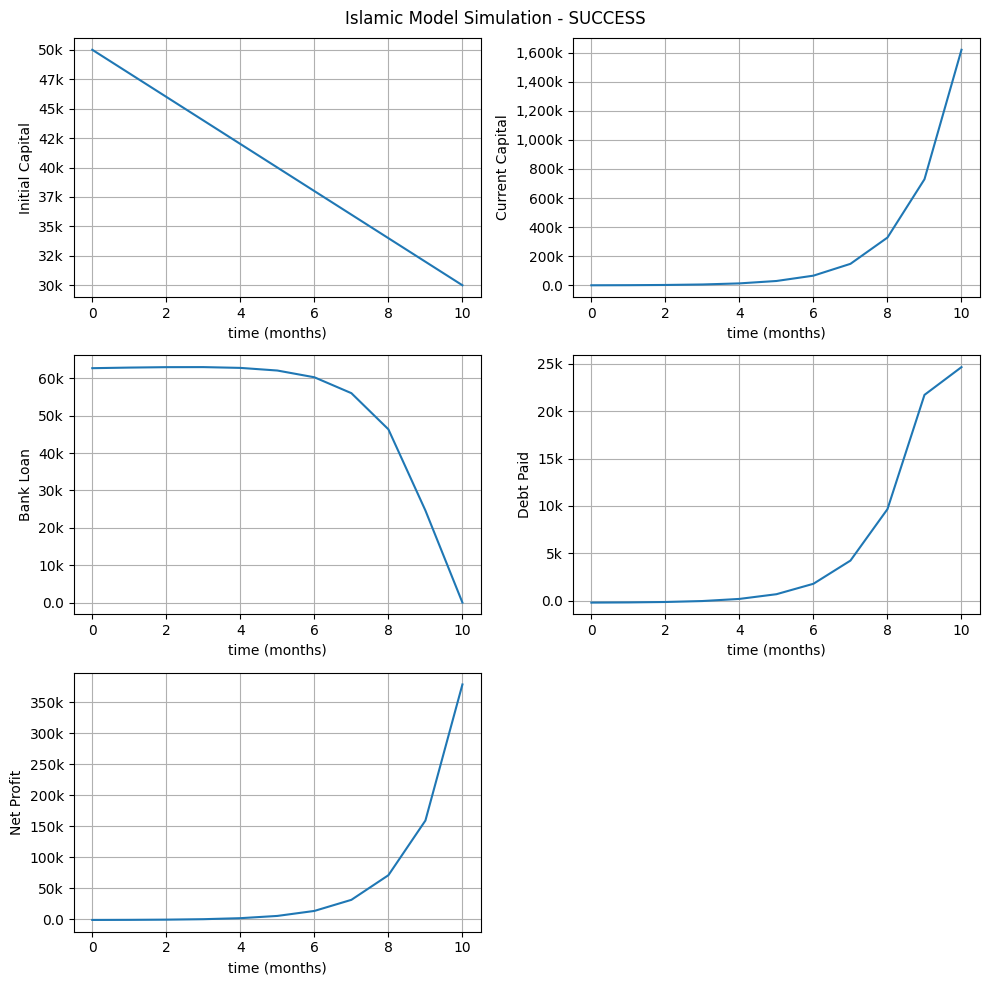

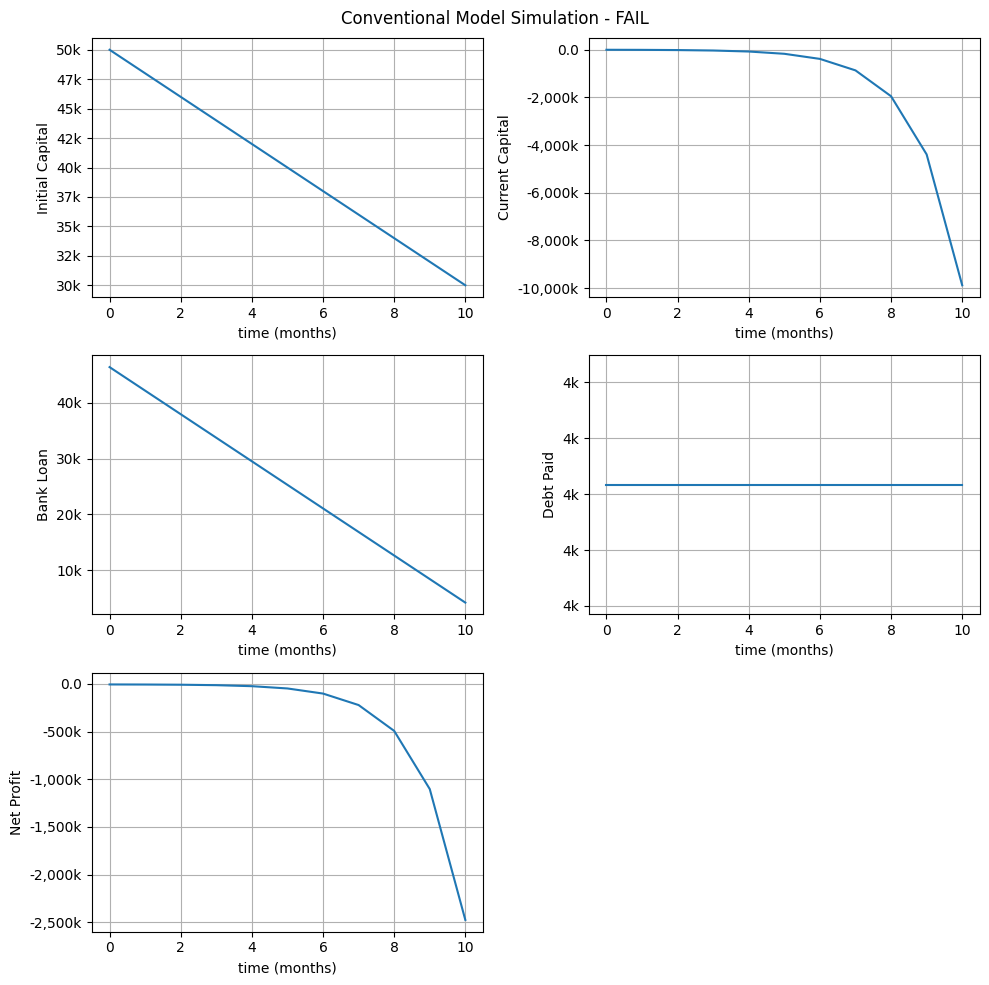

In [101]:
%matplotlib inline

from models.islamic_bank import IslamicModel
from models.conventional_bank import ConventionalModel

# setting parameter values for consistency
INITIAL_CAPITAL: int = 50_000
CURRENT_CAPITAL: int = 0
PROFIT_MARGIN: float = 0.25
EXPENSES: float = 2000.0
BANK_FEE: float = 0.25
BANK_SHARE: float = 0.12
INTEREST_RATE: float = 0.012
LOAN_PERIOD: int = 1
INITIAL_CAPITAL_REINVESTMENT: float = 2_000.0

# simulation time in months
SIMULATION_TIME: int = 50
GRACE_PERIOD: int = 10

# creating model objects
model_islamic = IslamicModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=PROFIT_MARGIN,
    expenses=EXPENSES,
    bank_fee=BANK_FEE,
    bank_share=BANK_SHARE,
    initial_capital_reinvestment=INITIAL_CAPITAL_REINVESTMENT
)

model_conventional = ConventionalModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=PROFIT_MARGIN,
    expenses=EXPENSES,
    interest_rate=INTEREST_RATE,
    loan_period=LOAN_PERIOD,
    initial_capital_reinvestment=INITIAL_CAPITAL_REINVESTMENT
)

# simulating the models
model_islamic.simulate(time_period=SIMULATION_TIME, grace_period=GRACE_PERIOD)
model_conventional.simulate(time_period=SIMULATION_TIME, grace_period=GRACE_PERIOD)

_ = model_islamic.simulation_graphs()
_ = model_conventional.simulation_graphs()

## Function Implementation Usability
I'm checking if the feature for passing functions work. Currently I only managed to implement for:
- `expenses`
- `initial_capital_reinvestment`
- `profit_margin`
- `dividend_payment`

In [102]:
import math

ExpenseFunc = lambda t : 0.5*t + 500
InvestmentFunc = lambda t : 100*t + 2000
ProfitFunc = lambda t : 0.25 * math.exp(0.01 * t)
DividendFunc = lambda t : 0.1 * t/(t+1)

model_islamic_2 = IslamicModel(
    INITIAL_CAPITAL,
    CURRENT_CAPITAL,
    ProfitFunc,
    ExpenseFunc,
    BANK_FEE,
    BANK_SHARE,
    InvestmentFunc,
    DividendFunc
)

model_conventional_2 = ConventionalModel(
    INITIAL_CAPITAL,
    CURRENT_CAPITAL,
    ProfitFunc,
    ExpenseFunc,
    INTEREST_RATE,
    LOAN_PERIOD,
    InvestmentFunc,
    DividendFunc
)

_ = model_islamic_2.simulate(SIMULATION_TIME, GRACE_PERIOD)
_ = model_conventional_2.simulate(SIMULATION_TIME, GRACE_PERIOD)


ISLAMIC BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@25.00%): 62,500.00

---------END OF SIMULATION----------
Status: SUCCESS
Total period of payment t = 9 months | Within grace period

Loan Remaining: 0.00 | Loan Paid: 62,500.00
Profit made (@27.35%): 602,981.19 | Final bank payment (@12.00%): 4,573.99 | Net profit: 597,902.70
Amount Reinvested: 4,949,857.97


CONVENTIONAL BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@1.20%): 50,600.00

---------END OF SIMULATION----------
Status: FAIL | Business is a LOSS MODEL
Total period of payment t = 10 months | Within grace period

Loan Remaining: 4,216.67 | Loan Paid: 46,383.33
Profit made (@27.63%): -1,429,640.33 | Final bank payment (@1.20%): 4,216.67 | Net profit: -1,434,362.00
Amount Reinvested: -11,655,701.97



## A Pseudo-Realistic Simulation
Below, I would like to investigate how the models will behave if <q>realistic</q> data is modelled via the functions and input into the simulation. This should hopefully show a better comparison of the simulation models. Let's hope for the best!

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# setting seed
np.random.seed(123456789)

# expense function
AVG_EXPENSE = 500
fE = lambda t : 10*(np.sin(2*t) + np.cos(0.5*t)) + 0.01*t + AVG_EXPENSE + 10*np.random.rand()

# profit margin function
fP = lambda t : 0.6*np.sin(2*t) + 0.4*np.cos(0.8*t) + 0.002*t + np.random.rand()

# investment function
BASE_INVESTMENT = 2000
fI = lambda t : 100*t + BASE_INVESTMENT

# dividend function
fD = lambda t : 0.1 * t/(t+1)

# t = np.linspace(0, 10, 11)
# y = [fD(x) for x in t]

# plt.grid(True)
# plt.xticks(t)
# plt.plot(t, y)


ISLAMIC BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@25.00%): 62,500.00

---------END OF SIMULATION----------
Status: SUCCESS
Total period of payment t = 7 months | Within grace period

Loan Remaining: 0.00 | Loan Paid: 62,500.00
Profit made (@92.21%): 878,477.59 | Final bank payment (@12.00%): 24,851.38 | Net profit: 853,123.29
Amount Reinvested: 2,681,067.34


CONVENTIONAL BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@1.20%): 50,600.00

---------END OF SIMULATION----------
Status: FAIL | Business is a LOSS MODEL
Total period of payment t = 10 months | Within grace period

Loan Remaining: 4,216.67 | Loan Paid: 46,383.33
Profit made (@137.68%): -11,499,561.77 | Final bank payment (@1.20%): 4,216.67 | Net profit: -11,504,292.44
Amount Reinvested: -27,166,213.60



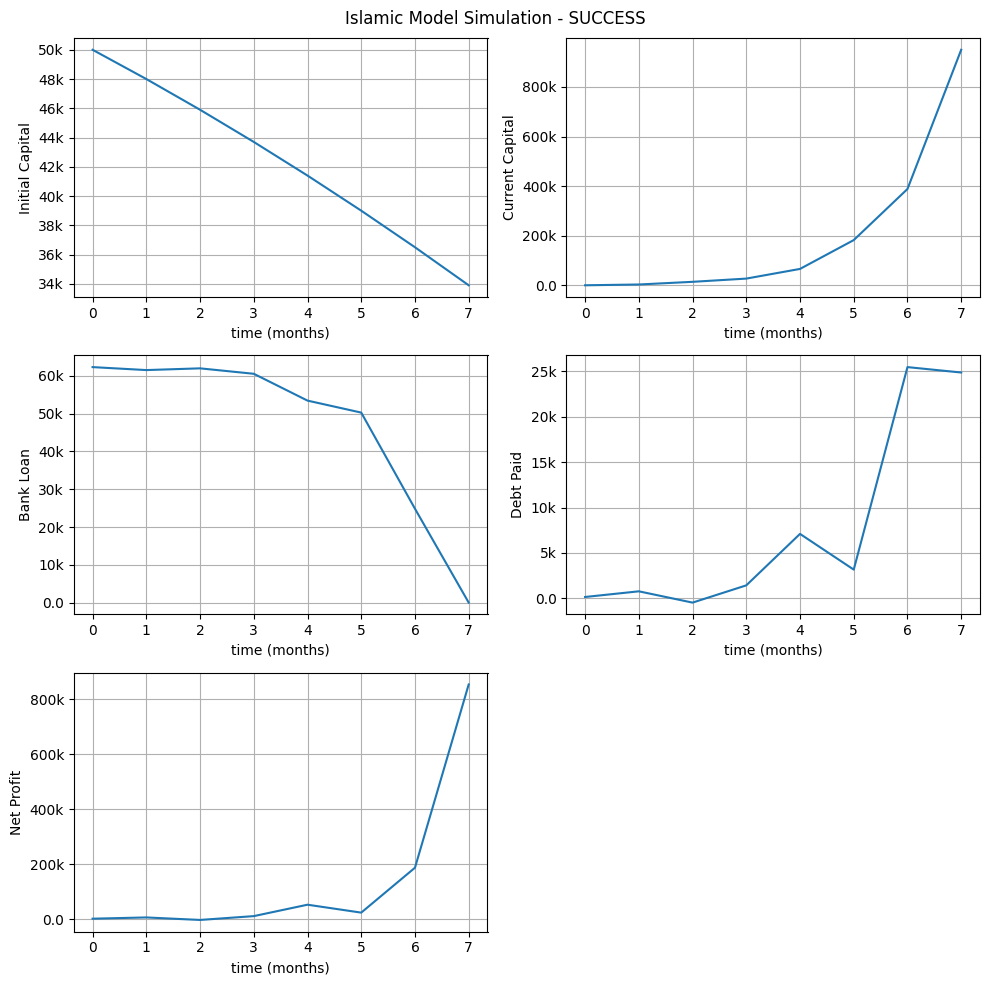

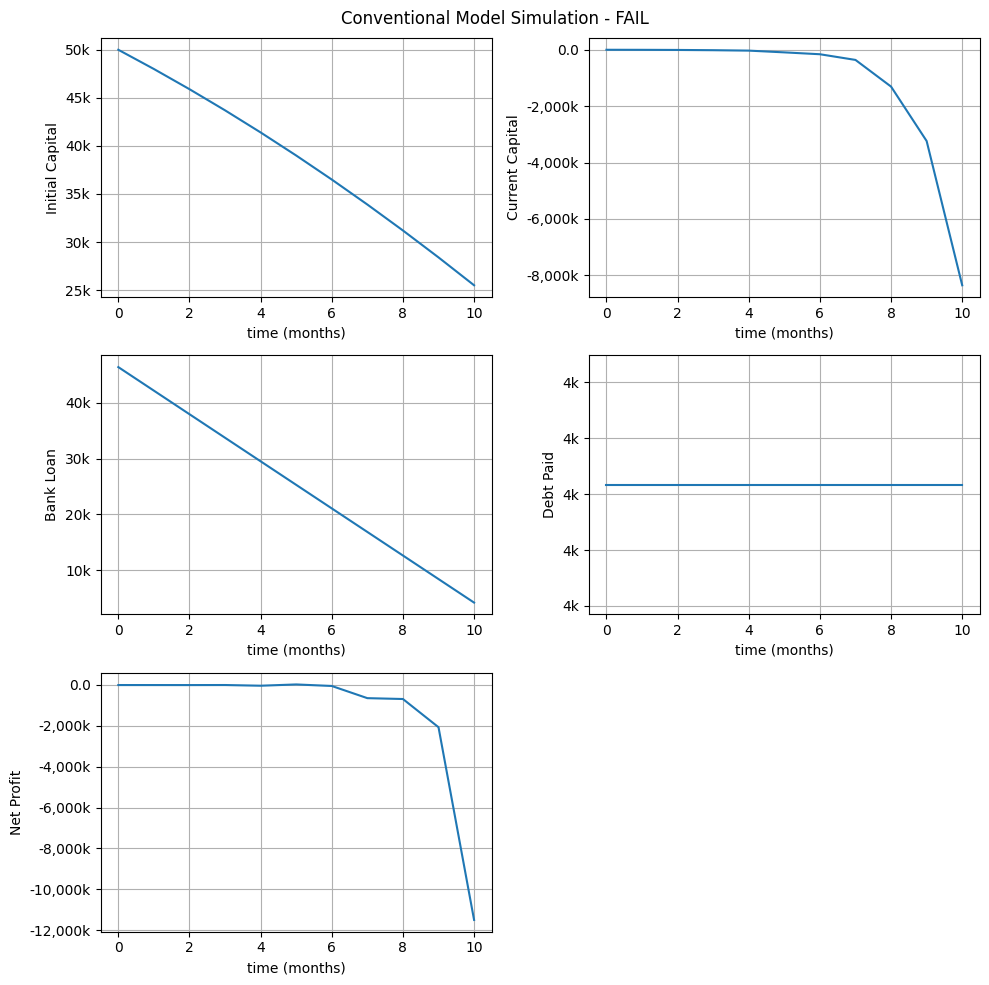

In [104]:
# islamic pseudo-realistic model
model_islamic_3 = IslamicModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=fP,
    expenses=fE,
    bank_fee=BANK_FEE,
    bank_share=BANK_SHARE,
    initial_capital_reinvestment=fI,
    dividend_payment=fD
)

# conventional pseudo-realistic model
model_conventional_3 = ConventionalModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=fP,
    expenses=fE,
    interest_rate=INTEREST_RATE,
    loan_period=LOAN_PERIOD,
    initial_capital_reinvestment=fI,
    dividend_payment=fD
)

_ = model_islamic_3.simulate(SIMULATION_TIME, GRACE_PERIOD)
_ = model_conventional_3.simulate(SIMULATION_TIME, GRACE_PERIOD)

_ = model_islamic_3.simulation_graphs()
_ = model_conventional_3.simulation_graphs()

## Checking out the validity of the continuous version of the Current Capital model
To convert the given recurrence relation into an explicit form, let's proceed step by step.

---

### Recurrence Relation:
$$C_{t+1} = (1 + \mu) C_t + \mu R - \frac{\mu - 1}{\rho} E,$$
with the initial condition:
$$C_0 = \psi.$$

Here, $ \mu $, $ R $, $ \rho $, and $ E $ are constants.

---

### Step 1: General form of the solution
The recurrence has the form:
$$C_{t+1} = a C_t + b,$$
where:
$$a = 1 + \mu, \quad b = \mu R - \frac{\mu - 1}{\rho} E.$$

The general solution to such a recurrence is:
$$C_t = A a^t + C_t^{\text{(part)}},$$
where:
- $ A a^t $ is the solution to the **homogeneous equation** ($ C_{t+1} = a C_t $),
- $ C_t^{\text{(part)}} $ is a **particular solution** for the full equation.

---

### Step 2: Homogeneous solution
The homogeneous part corresponds to:
$$C_{t+1} = a C_t,$$
which has a solution of the form:
$$C_t^{\text{(hom)}} = A a^t,$$
where $ A $ is a constant determined by the initial condition.

---

### Step 3: Particular solution
The particular solution $ C_t^{\text{(part)}} $ is a constant, since $ b $ does not depend on $ t $. Let $ C_t^{\text{(part)}} = C_{\text{part}} $. Substituting this into the recurrence:
$$C_{\text{part}} = a C_{\text{part}} + b.$$
Simplify:
$$C_{\text{part}} (1 - a) = b.$$
Solve for $ C_{\text{part}} $:
$$C_{\text{part}} = \frac{b}{1 - a}, \quad \text{for } a \neq 1.$$

Substitute $ a = 1 + \mu $ and $ b = \mu R - \frac{\mu - 1}{\rho} E $:
$$C_{\text{part}} = \frac{\mu R - \frac{\mu - 1}{\rho} E}{1 - (1 + \mu)} = \frac{\mu R - \frac{\mu - 1}{\rho} E}{- \mu}.$$
Simplify:
$$C_{\text{part}} = -\frac{\mu R}{\mu} + \frac{\frac{\mu - 1}{\rho} E}{\mu} = -R + \frac{\mu - 1}{\mu \rho} E.$$

Thus:
$$C_{\text{part}} = -R + \frac{\mu - 1}{\mu \rho} E.$$

---

### Step 4: Combine solutions
The general solution is:
$$C_t = A a^t + C_{\text{part}}.$$
Substitute $ a = 1 + \mu $ and $ C_{\text{part}} $:
$$C_t = A (1 + \mu)^t - R + \frac{\mu - 1}{\mu \rho} E.$$

---

### Step 5: Apply the initial condition
Use $ C_0 = \psi $ to determine $ A $:
$$C_0 = A (1 + \mu)^0 - R + \frac{\mu - 1}{\mu \rho} E.$$
Simplify:
$$\psi = A - R + \frac{\mu - 1}{\mu \rho} E.$$
Solve for $ A $:
$$A = \psi + R - \frac{\mu - 1}{\mu \rho} E.$$

---

### Final Explicit Formula
Substitute $ A $ into the general solution:
$$C_t = \left( \psi + R - \frac{\mu - 1}{\mu \rho} E \right) (1 + \mu)^t - R + \frac{\mu - 1}{\mu \rho} E.$$

This is the explicit formula for $ C_t $ in terms of $ t $.


ISLAMIC BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@25.00%): 62,500.00

---------END OF SIMULATION----------
Status: SUCCESS
Total period of payment t = 10 months | Within grace period

Loan Remaining: 0.00 | Loan Paid: 62,500.00
Profit made (@25.00%): 405,513.45 | Final bank payment (@12.00%): 24,629.82 | Net profit: 378,883.62
Amount Reinvested: 3,620,991.20

Discrete model current capital: 1620053.7877209652
Analytical model current capital: 1620053.7877209631


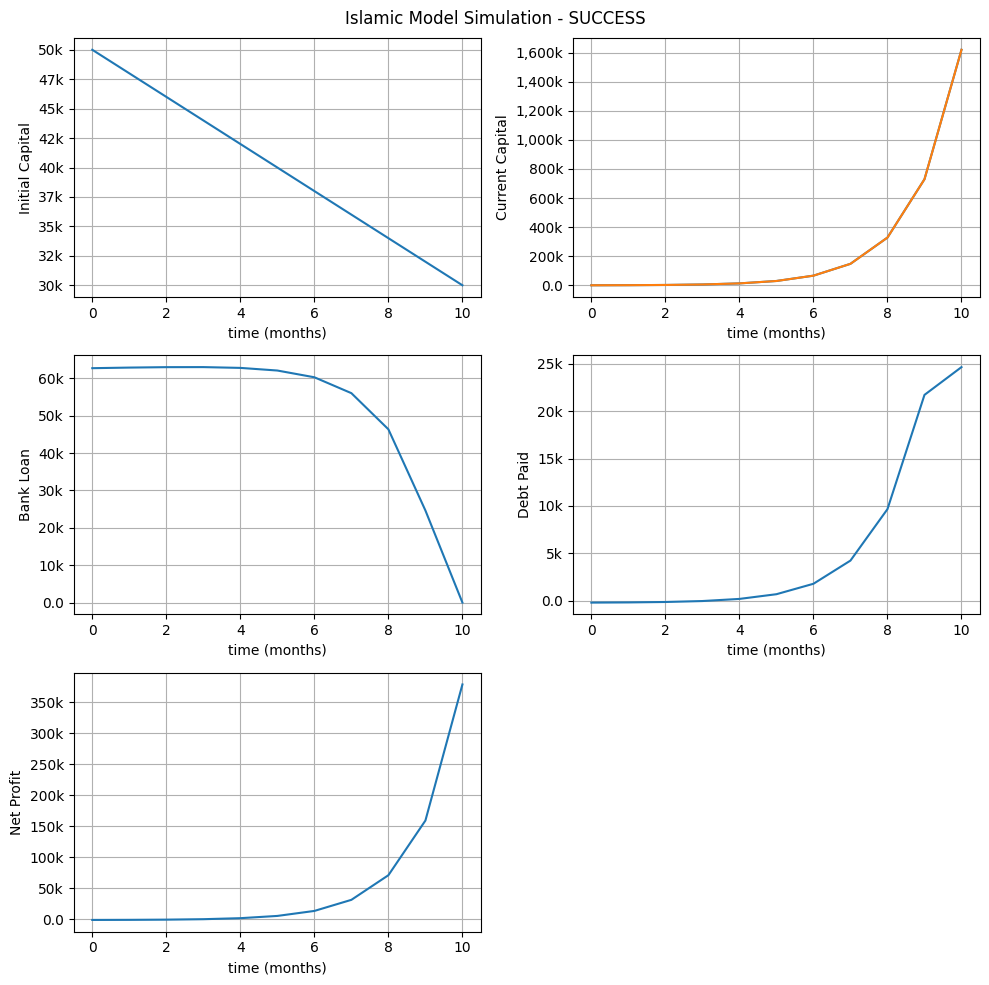

In [132]:
np.random.seed(123456789)

# Graphs for our constant case according to recurrance relations i.e. iterative method
model_islamic = IslamicModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=PROFIT_MARGIN,
    expenses=EXPENSES,
    bank_fee=BANK_FEE,
    bank_share=BANK_SHARE,
    initial_capital_reinvestment=INITIAL_CAPITAL_REINVESTMENT
)
model_islamic.simulate(time_period=SIMULATION_TIME, grace_period=GRACE_PERIOD)

# simulating the analytical model
DIVIDEND = 0
mu = 1 + (PROFIT_MARGIN * (1 - DIVIDEND) * (1 - BANK_SHARE))
k = (mu - 1)/(mu * PROFIT_MARGIN)
C = lambda t : (CURRENT_CAPITAL + INITIAL_CAPITAL_REINVESTMENT - EXPENSES*k)*(np.float_power((1+mu), t)) - INITIAL_CAPITAL_REINVESTMENT+(k*EXPENSES)

epochs = model_islamic.simulation_values()['time_period']

print(f"Discrete model current capital: {model_islamic.simulation_values()['current_capital'][-1]}")
print(f"Analytical model current capital: {C(epochs[-1])}")

_, _, ax, _, _, _ = model_islamic.simulation_graphs()
ax.plot(epochs, C(epochs))